In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Formula 1 и пит-стопы
_Задачи:_

1) На каких гонках в среднем были самые быстрые пит-стопы?

2) В какой команде, на каком этапе и с каким пилотом был самый быстрый пит-стоп

_План по решению задачи 1:_

1) подгружаем датасет с временем пит-стопов

2) узнаем среднее значение времени питстопов для каждого гран-при

3) находим минимальное (и максимальное, чтобы узнать, из-за чего это произошло)

4) по id вытаскиваем строку из базы гонок, а также по id узнаем трассу

In [2]:
# загрузка базы
pits = pd.read_csv("pit_stops.csv")
drivers = pd.read_csv('drivers.csv')
race = pd.read_csv('races.csv')
result = pd.read_csv('results.csv')
constr = pd.read_csv('constructors.csv')
circuit = pd.read_csv('circuits.csv')
constr.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [3]:
# создадим датафрейм для удобства
data = pd.DataFrame(pits)
data['surname'] = ''
data['constructor'] = ''
data['race'] = ''
data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,surname,constructor,race
0,841,153,1,1,17:05:23,26.898,26898,,,
1,841,30,1,1,17:05:52,25.021,25021,,,
2,841,17,1,11,17:20:48,23.426,23426,,,
3,841,4,1,12,17:22:34,23.251,23251,,,
4,841,13,1,13,17:24:10,23.842,23842,,,


In [4]:
driverid = list(pits['driverId'].values)
drdict = {}
for i in driverid:
    if i not in drdict:
        drdict[i] = drivers[drivers['driverId'] == i]['surname'].values[0] 
for i in drdict:
    data.loc[data['driverId'] == i, 'surname'] = drdict[i]

In [5]:
rcdict = {}
for i in driverid:
    rcdict[i] = list(np.unique(pits[pits['driverId'] == i]['raceId'].values))
ar = list(np.unique(pits['raceId'].values))

In [6]:
codict = {}
for i in rcdict:
    for j in ar:
        if np.any(rcdict[i] == j):
            cdf = result[result['raceId'] == j]
            cdf = int(cdf[cdf['driverId'] == i]['constructorId'].values)
            codict[i] = constr[constr['constructorId'] == cdf]['name'].values[0]

In [7]:
for i in codict:
    data.loc[data['driverId'] == i, 'constructor'] = codict[i]

In [8]:
racid = list(pits['raceId'].values)
racedict = {}
for i in racid:
    if i not in racedict:
        racedict[i] = race[race['raceId'] == i]['name'].values[0]
for i in racedict:
    data.loc[data['raceId'] == i, 'race'] = racedict[i]

In [9]:
datedict = {}
for i in racid:
    if i not in datedict:
        datedict[i] = race[race['raceId'] == i]['date'].values[0]
for i in racedict:
    data.loc[data['raceId'] == i, 'date'] = datedict[i]
data.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,surname,constructor,race,date
0,841,153,1,1,17:05:23,26.898,26898,Alguersuari,Toro Rosso,Australian Grand Prix,2011-03-27
1,841,30,1,1,17:05:52,25.021,25021,Schumacher,Mercedes,Australian Grand Prix,2011-03-27
2,841,17,1,11,17:20:48,23.426,23426,Webber,Red Bull,Australian Grand Prix,2011-03-27
3,841,4,1,12,17:22:34,23.251,23251,Alonso,McLaren,Australian Grand Prix,2011-03-27
4,841,13,1,13,17:24:10,23.842,23842,Massa,Williams,Australian Grand Prix,2011-03-27


In [14]:
# находим все id грап-при в базе, и количество пит-стопов во время них
cat, cnt = np.unique(
        data["raceId"].values, return_counts = True)

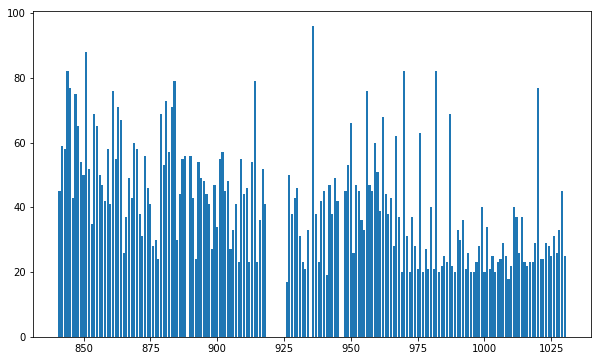

In [18]:
#построим график с общим количеством питсопов в каждой гонке
fig, pl = plt.subplots()
pl.bar(cat, cnt)

fig.set_figwidth(10)
fig.set_figheight(6)

plt.show()

In [19]:
mat = [] # для средних значений
cat = list(cat) # костыль
cnt = list(cnt)

for i in cat:
    onerace = data[data['raceId'] == i] # время всех пит-стопов одного гран-при
    onerace1 = sum(onerace['milliseconds'].values)/onerace.shape[0] # среднее время пит-стопов одного гран-при
    mat.append(onerace1) # все в список для простоты
    
# находим индекс минимального значения и смторим raceid по нему
iden_race = cat[mat.index(min(mat))] # костыльно, конечно, но все работает :D

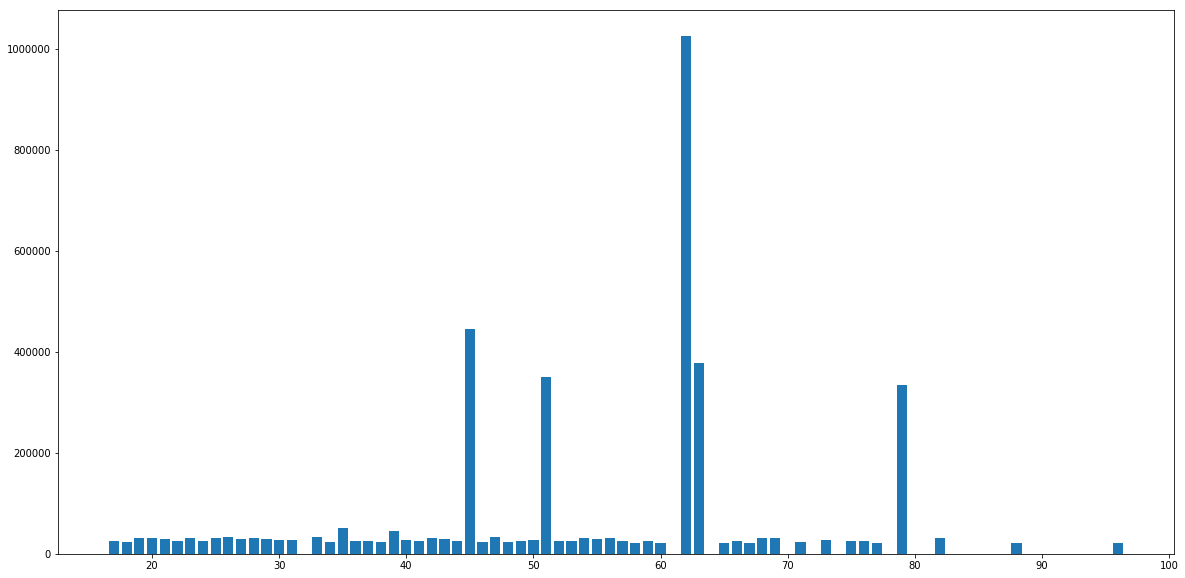

In [20]:
# График зависимости среднего времени пит-стопов от их количества за одно гран-при
fig, pl = plt.subplots()
pl.bar(cnt, mat)

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

In [21]:
# удаляем 7 самых высоких значений времени, чтобы лучше был виден график
# Тк задача найти минимальное, на решение не повлияет
for i in range(0,7):
    mat[mat.index(max(mat))] = 0

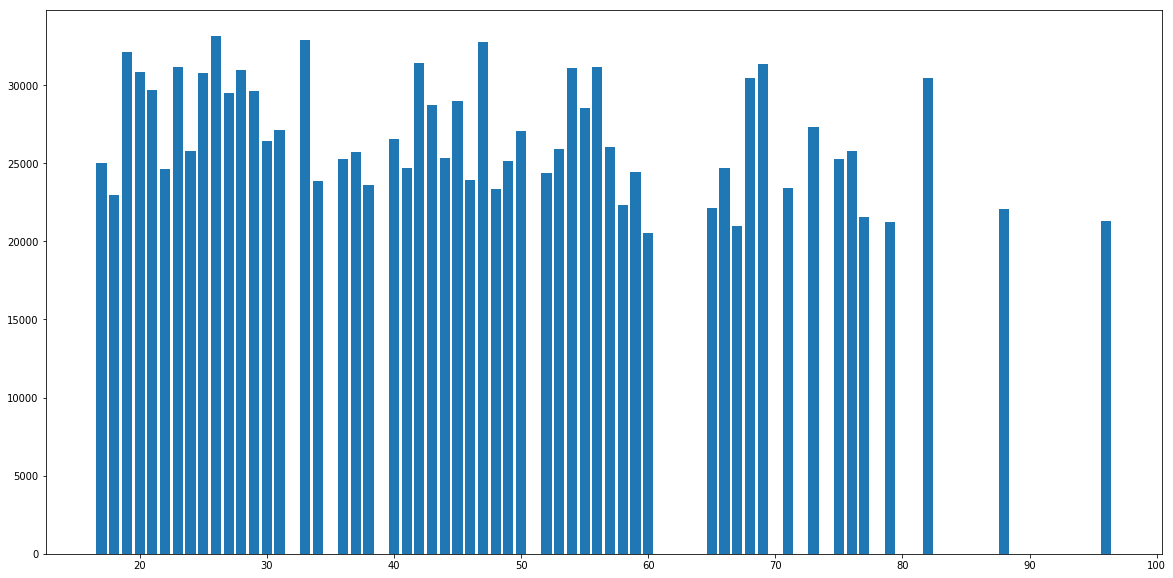

In [22]:
# График зависимости среднего времени пит-стопов от их количества за одно гран-при
fig, pl = plt.subplots()
pl.bar(cnt, mat)

fig.set_figwidth(20)
fig.set_figheight(10)

plt.show()

### Можем наблюдать, что прямой корреляции среднего времени пит-стопов от их количества в одном гран-при нет

In [23]:
# по raceid узнаем дату и время гонки, а так же id локации
# на которой самое низкое среднее время пит-стопов
race_pit = race[race['raceId'] == iden_race]
race_pit

,raceId,year,round,circuitId,name,date,time,url
867,869,2012,10,10,German Grand Prix,2012-07-22,12:00:00,http://en.wikipedia.org/wiki/2012_German_Grand...


In [24]:
# узнаем локацию, на которой проходил гран-при с самым 
# малым средним значением времени пит-стопов
iden_cir = int(race_pit['circuitId'].values)
circuit[circuit['circuitId'] == iden_cir]

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
9,10,hockenheimring,Hockenheimring,Hockenheim,Germany,49.3278,8.56583,\N,http://en.wikipedia.org/wiki/Hockenheimring


In [25]:
# построим график, где x - время всех пит-стопов одного пилота во время этого гран-при, а y - фамилия пилота
for_plot = data[data['raceId'] == iden_race]

In [26]:
x = list(for_plot['surname'].values)

In [27]:
y = []
for i in x:
    l = for_plot[for_plot['surname'] == i]
    l = list(l['milliseconds'].values)
    y.append(sum(l)/len(l))

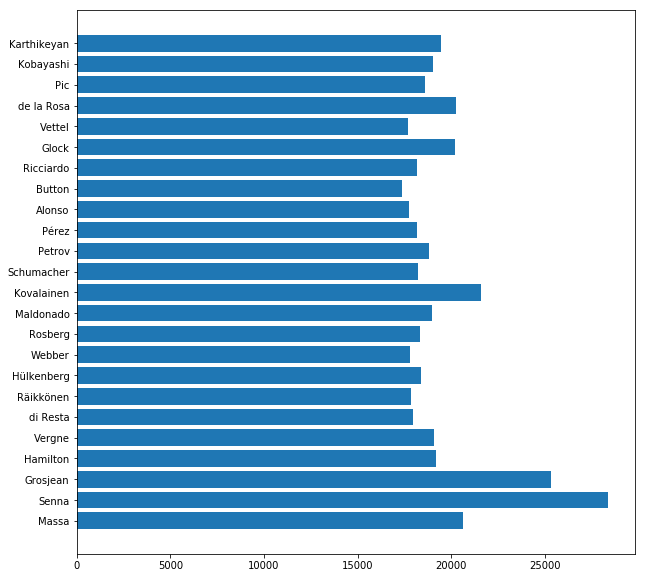

In [28]:
fig, pl = plt.subplots()

pl.barh(x, y)

fig.set_figwidth(10)
fig.set_figheight(10)

plt.show()

_План по решению задачи 2:_

1) подгружаем датасет с временем пит-стопов (с прошлой задачи)

2) узнаем минимальное значение времени среди всех гран-при

3) по id узнаем гонку, локацию и пилота, а также, какое он занял место

In [29]:
pit_min = data[data['milliseconds'] == min(list(pits['milliseconds'].values))]
pit_min

,raceId,driverId,stop,lap,time,duration,milliseconds,surname,constructor,race,date
1037,858,813,2,30,17:58:49,12.897,12897,Maldonado,Lotus F1,Abu Dhabi Grand Prix,2011-11-13


In [30]:
dr = int(pit_min['driverId'])
rc = int(pit_min['raceId'])

In [31]:
driver_top = drivers[drivers['driverId'] == dr]

team_topid = result[result['raceId'] == rc]
team_topid = team_topid[team_topid['driverId'] == dr]
team_topid = int(team_topid['constructorId'])

team_top = constr[constr['constructorId'] == team_topid]

In [32]:
race_top = race[race['raceId'] == rc]

loc_top = circuit[circuit['circuitId'] == int(race_top['circuitId'])]

In [33]:
team_top

,constructorId,constructorRef,name,nationality,url
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...


In [34]:
driver_top

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
812,813,maldonado,13,MAL,Pastor,Maldonado,1985-03-09,Venezuelan,http://en.wikipedia.org/wiki/Pastor_Maldonado


In [35]:
race_top

,raceId,year,round,circuitId,name,date,time,url
856,858,2011,18,24,Abu Dhabi Grand Prix,2011-11-13,13:00:00,http://en.wikipedia.org/wiki/2011_Abu_Dhabi_Gr...


In [36]:
loc_top

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
23,24,yas_marina,Yas Marina Circuit,Abu Dhabi,UAE,24.4672,54.6031,\N,http://en.wikipedia.org/wiki/Yas_Marina_Circuit


In [37]:
print('Самый быстрый пит-стоп был произведен командой {0} на {1}, в городе {2} {6} на треке {3}. За рулем болида был {4} {5}'.format(
    team_top['name'].values[0], race_top['name'].values[0], 
    loc_top['location'].values[0], loc_top['name'].values[0], 
    driver_top['forename'].values[0], driver_top['surname'].values[0],
    race_top['date'].values[0]
    ))

Самый быстрый пит-стоп был произведен командой Williams на Abu Dhabi Grand Prix, в городе Abu Dhabi 2011-11-13 на треке Yas Marina Circuit. За рулем болида был Pastor Maldonado
